In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaneddata.csv')

In [5]:
import pandas as pd

# Calculate the age ranges for each generation category
generation_ranges = {
    'Silent Generation': (1925, 1945),
    'Baby Boomers': (1946, 1964),
    'Generation X': (1965, 1980),
    'Millennials': (1981, 1996),
    'Generation Z': (1997, 2012)
}

# Extract the birth year from the 'dob' column
df['year'] = pd.to_datetime(df['dob'], format='%d/%m/%Y').dt.year

# Filter the dataset for each generation category and count the number of individuals
generation_counts = {}
for generation, age_range in generation_ranges.items():
    filtered_df = df[(df['year'] >= age_range[0]) & (df['year'] <= age_range[1])]
    generation_counts[generation] = len(filtered_df)

# Print the population count for each generation category
for generation, count in generation_counts.items():
    print(f"{generation}: {count}")


Silent Generation: 4277
Baby Boomers: 10481
Generation X: 13113
Millennials: 12502
Generation Z: 2256


In [4]:
df.columns


Index(['year', 'month', 'HOM_tag', 'HOM_total', 'Entertainment',
       'Entertainment_Freq', 'Food', 'Food_Freq', 'HealthFitness',
       'HealthFitness_Freq', 'Home', 'Home_Freq', 'KidsPets', 'KidsPets_Freq',
       'PersonalCare', 'PersonalCare_Freq', 'next_HOM_total', 'gender', 'job',
       'Grocery', 'Grocery_Freq', 'Miscellaneous', 'Miscellaneous_Freq',
       'Shopping', 'Shopping_Freq', 'Travel', 'dob', 'Travel_Freq',
       'Total_Spending', 'Average_Spending', 'Most_Frequent_Category'],
      dtype='object')

In [5]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'job'])

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
numeric_columns = ['HOM_total', 'Entertainment', 'Food', 'HealthFitness', 'Home', 'KidsPets', 'PersonalCare', 'Grocery',
                   'Miscellaneous', 'Shopping', 'Travel']
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [7]:
# Extract quarter and day of the week from 'year' and 'month'
df_encoded['quarter'] = pd.to_datetime(df_encoded['year'].astype(str) + df_encoded['month'].astype(str), format='%Y%m').dt.quarter
df_encoded['day_of_week'] = pd.to_datetime(df_encoded['year'].astype(str) + df_encoded['month'].astype(str), format='%Y%m').dt.dayofweek

In [8]:
# Drop unnecessary columns LATERRRR
df_encoded.drop(['year', 'month'], axis=1, inplace=True)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
# Separate the features (X) and the target variable (y)
X = df_encoded.drop('HOM_total', axis=1)
y = df_encoded['HOM_total']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Verify the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (34140, 505) (34140,)
Testing set shape: (8536, 505) (8536,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
# Perform one-hot encoding on the categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the target variable to float
y = y.astype(float)


In [15]:
# Perform one-hot encoding on the categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the target variable to float
y = y.astype(float)

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_train)

LinearRegression()

In [17]:
# Initialize and train the random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_encoded, y_train)

RandomForestRegressor()

In [18]:
# Make predictions
linear_predictions = linear_model.predict(X_test_encoded)
rf_predictions = rf_model.predict(X_test_encoded)

In [19]:
# Evaluate model performance
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

In [20]:
# Print evaluation results
print("Linear Regression MSE:", linear_mse)
print("Linear Regression MAE:", linear_mae)
print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression MAE:", rf_mae)

Linear Regression MSE: 5.798770676031128e-32
Linear Regression MAE: 1.754516262356659e-16
Random Forest Regression MSE: 7.069811648785018e-06
Random Forest Regression MAE: 3.964634235928481e-05


In [21]:
linear_predictions = linear_model.predict(X_encoded)
rf_predictions = rf_model.predict(X_encoded)

In [22]:
# Print the predicted spending trends for linear regression model
print("Linear Regression Predictions:")
print(linear_predictions)

# Print the predicted spending trends for random forest regression model
print("Random Forest Regression Predictions:")
print(rf_predictions)

Linear Regression Predictions:
[0.07928604 0.15077238 0.10100472 ... 0.01687042 0.01746581 0.04374014]
Random Forest Regression Predictions:
[0.0792817  0.15080337 0.10100445 ... 0.0168709  0.017469   0.04374004]


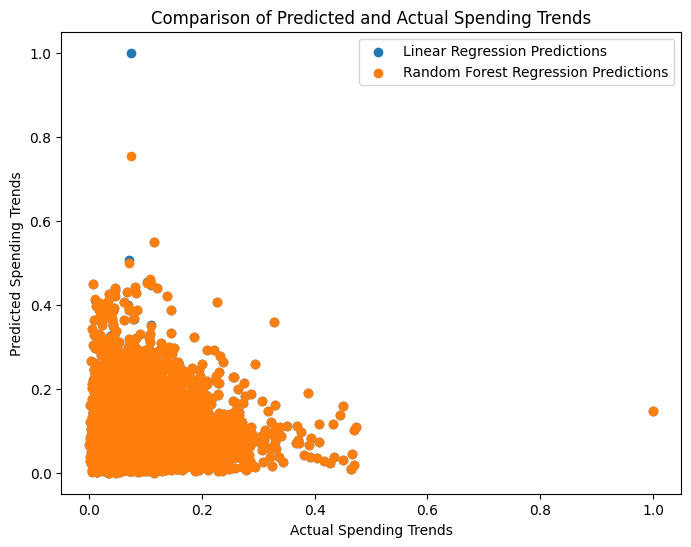

In [23]:
import matplotlib.pyplot as plt

# Scatter plot with actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions[:len(y_test)], label='Linear Regression Predictions')
plt.scatter(y_test, rf_predictions[:len(y_test)], label='Random Forest Regression Predictions')
plt.xlabel('Actual Spending Trends')
plt.ylabel('Predicted Spending Trends')
plt.legend()
plt.title('Comparison of Predicted and Actual Spending Trends')
plt.show()

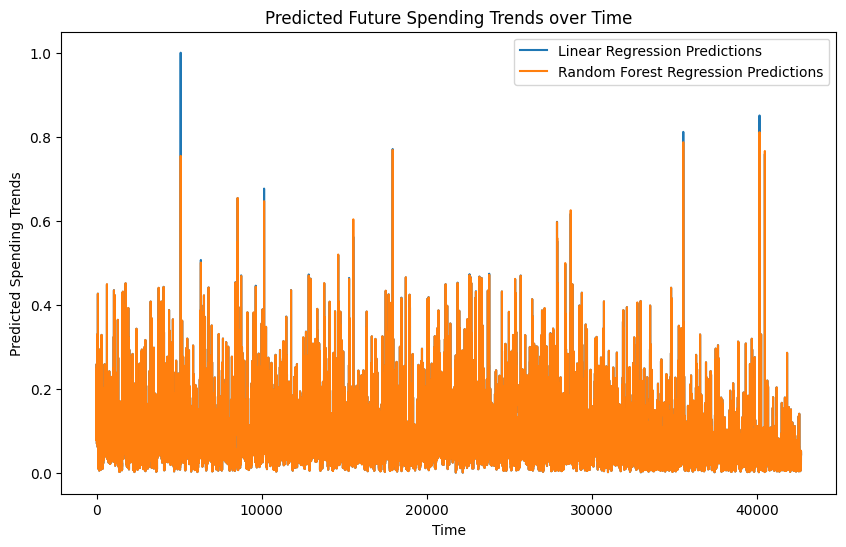

In [24]:
import matplotlib.pyplot as plt

# Assuming you have a time series column 'date' in your dataset
dates = range(len(linear_predictions))

# Plot the linear regression predictions over time
plt.figure(figsize=(10, 6))
plt.plot(dates, linear_predictions, label='Linear Regression Predictions')

# Plot the random forest regression predictions over time
plt.plot(dates, rf_predictions, label='Random Forest Regression Predictions')

plt.xlabel('Time')
plt.ylabel('Predicted Spending Trends')
plt.legend()
plt.title('Predicted Future Spending Trends over Time')
plt.show()
